In [4]:
#Bicycle Counts on Seattle's Fremont Bridge - Time Series
import pandas as pd
path = "C:/Users/antib/Documents/ML_Study/Seattle_Fremont_Bridge_Bike_Counts.csv"
df = pd.read_csv(path)
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2012-10-03T00:00:00,9.0,4.0
1,2012-10-03T01:00:00,6.0,4.0
2,2012-10-03T02:00:00,1.0,1.0
3,2012-10-03T03:00:00,3.0,2.0
4,2012-10-03T04:00:00,1.0,6.0


In [7]:
import pandas as pd
data = pd.read_csv("C:/Users/antib/Documents/ML_Study/Seattle_Fremont_Bridge_Bike_Counts.csv", index_col= 'Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [8]:
data.columns = ["East", "West"]
data["Total"] = data["West"] + data["East"]
data.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [9]:
data.dropna().describe()

,East,West,Total
count,50319.000000,50319.000000,50319.000000
mean,56.934399,52.940678,109.875077
std,82.835585,68.728939,138.526584
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,717.000000,698.000000,957.000000


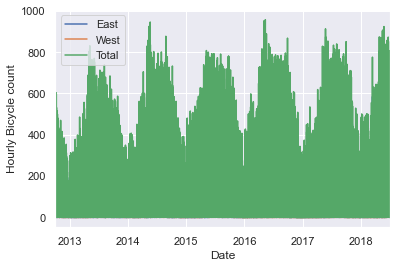

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

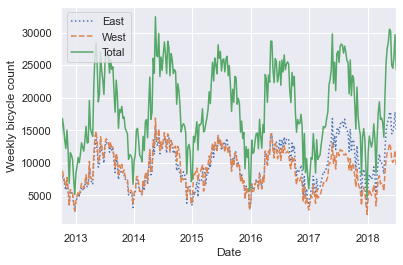

In [15]:
#weekly summary
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

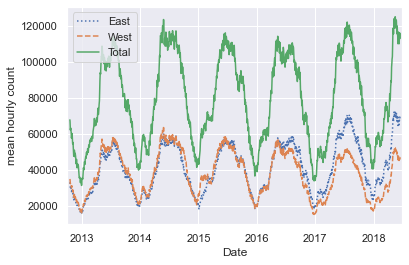

In [16]:
#daily summary
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

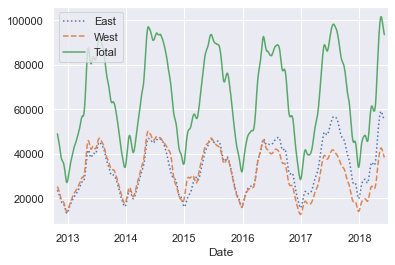

In [18]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])
plt.show()                                                           

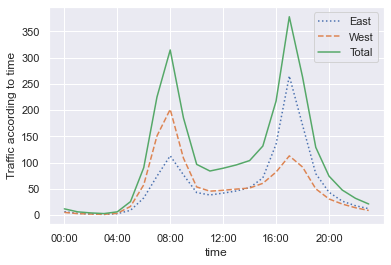

In [19]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()